C:\Users\HP\AppData\Local\Temp\ipykernel_13316\311132006.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2020-01-01", periods=36, freq="M"),
C:\Users\HP\AppData\Local\Temp\ipykernel_13316\311132006.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.asfreq("M")   # FIX: Explicit monthly frequency


Dataset (Frequency Fixed):
            Sales
Month            
2020-01-31    120
2020-02-29    130
2020-03-31    125
2020-04-30    140
2020-05-31    160


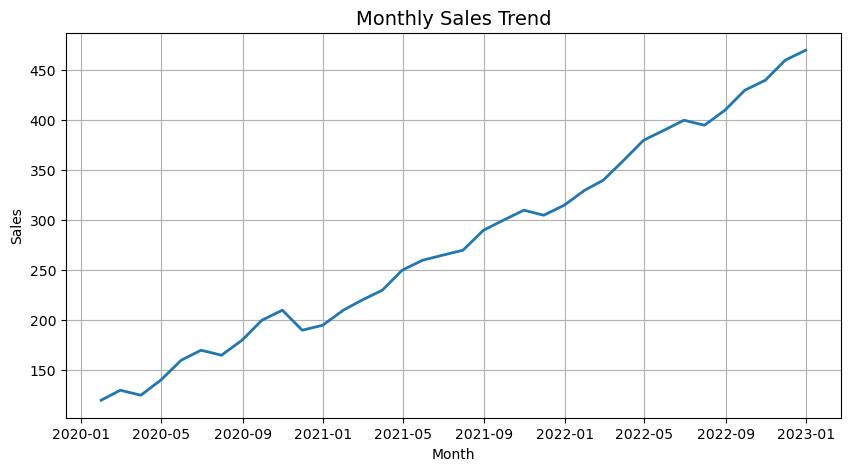

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



MODEL SUMMARY:
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -128.729
Date:                Thu, 04 Dec 2025   AIC                            263.459
Time:                        19:42:36   BIC                            268.125
Sample:                    01-31-2020   HQIC                           265.069
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2064.254      0.000       0.999       1.001
ma.L1         -0.9975      0.224     -4.450      0.000      -1.437      -0.558
sigma2        82.5405      0.003   3

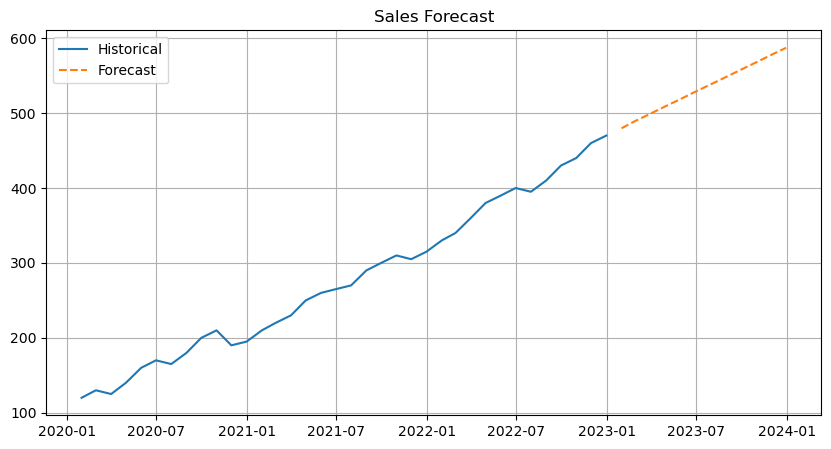

In [3]:
# ================================================
# PROJECT 1 (FIXED): SALES FORECASTING USING ARIMA
# ================================================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# -------------------------
# Step 1: Create Dataset
# -------------------------
df = pd.DataFrame({
    "Month": pd.date_range(start="2020-01-01", periods=36, freq="M"),
    "Sales": [
        120,130,125,140,160,170,165,180,200,210,190,195,
        210,220,230,250,260,265,270,290,300,310,305,315,
        330,340,360,380,390,400,395,410,430,440,460,470
    ]
})

# Set datetime index + fix frequency issue
df = df.set_index("Month")
df = df.asfreq("M")   # FIX: Explicit monthly frequency

print("Dataset (Frequency Fixed):")
print(df.head())

# -------------------------
# Step 2: Visualize Sales Trend
# -------------------------
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Sales"], linewidth=2)
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# -------------------------
# Step 3: Fit ARIMA Model
# -------------------------
model = ARIMA(df["Sales"], order=(1,1,1))
fit = model.fit()

print("\nMODEL SUMMARY:")
print(fit.summary())

# -------------------------
# Step 4: Forecast Next 12 Months
# -------------------------
forecast = fit.forecast(12)

print("\nFORECASTED SALES (Next 12 Months):")
print(forecast)

# -------------------------
# Step 5: Plot Forecast
# -------------------------
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Sales"], label="Historical")
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("Sales Forecast")
plt.grid(True)
plt.show()
